In [1]:
!pip install iminuit


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 10.2 MB/s eta 0:00:00


In [2]:
import numpy as np
from iminuit import Minuit

In [3]:
def sphere(params):
    return params @ params


In [5]:
m = Minuit(sphere, params=5)  # starting values for α and β

m.migrad()  # finds minimum of least_squares function
m.hesse()

TypeError: unsupported operand type(s) for @: 'numpy.float64' and 'numpy.float64'

In [ ]:
import numpy as np
import optimagic as om

def sphere(params):
    return params @ params

# Test with numpy array parameters
iminuit_res_np = om.minimize(
    fun=sphere,
    params=np.arange(5),
    algorithm="iminuit_migrad",
)

print("iminuit_migrad with numpy array:")
print(iminuit_res_np)
print("Optimized parameters:", iminuit_res_np.params.round(5))


In [7]:
from matplotlib import pyplot as plt

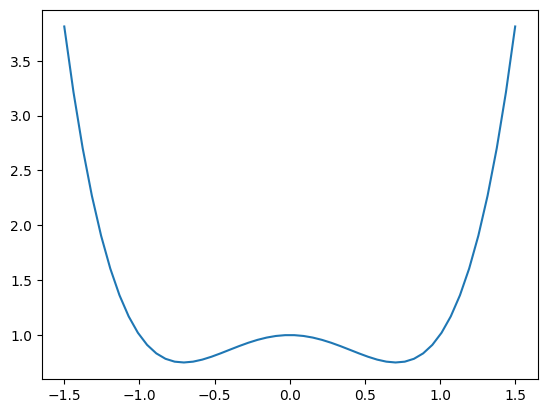

In [8]:
def cost_function_with_two_minima(x):
    return x**4 - x**2 + 1


x = np.linspace(-1.5, 1.5)
plt.plot(x, cost_function_with_two_minima(x));

In [15]:
# starting at -0.1 gives the left minimum
m = Minuit(cost_function_with_two_minima, x=0.1)
m.migrad()
print("starting value -0.1, minimum at", m.values["x"])

# changing the starting value to 0.1 gives the right minimum
# m.values["x"] = 0.1  # m.values[0] = 0.1 also works
# m.migrad()
# print("starting value +0.1, minimum at", m.values["x"])



starting value -0.1, minimum at 0.7085906080341975


In [18]:
m.params

,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed
0,x,0.5,0.7,,,0,0.5,


In [13]:
m.fmin

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 0.75                       │              Nfcn = 35               │
│ EDM = 4.4e-06 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘

In [14]:
m.valid

True

In [17]:
m.limits = [(0,0.5)]

In [21]:
np.array(m.values)

array([0.5])

In [22]:
m.fval

0.7500044127295582

In [24]:
m.fmin

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 0.75                       │              Nfcn = 35               │
│ EDM = 4.4e-06 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘

In [25]:
repr(m.fmin)

"<FMin algorithm='Migrad' edm=4.403561529873038e-06 edm_goal=0.0002 errordef=1.0 fval=0.7500044127295582 has_accurate_covar=True has_covariance=True has_made_posdef_covar=False has_parameters_at_limit=False has_posdef_covar=True has_reached_call_limit=False has_valid_parameters=True hesse_failed=False is_above_max_edm=False is_valid=True nfcn=35 ngrad=0 reduced_chi2=nan time=0.00014946999999665422>"

In [2]:
import inspect

In [3]:
def abbb(a,b):
  return a+b

In [5]:
signature = inspect.signature(abbb)
parameters = signature.parameters
parameters

mappingproxy({'a': <Parameter "a">, 'b': <Parameter "b">})